In [1]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) / 255 for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [2]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = False, return_diagrams = False)
extractor = extractor.fit(train_images, "12/train")
train_features = extractor.transform(train_images, "12/train")
test_features = extractor.transform(test_images, "12/test")

Calculating inverted images
GreyscaleExtractor: processing 12/train/greyscale, do_fit = True
Got the result from ./12/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./12/train/greyscale/features.npy
GreyscaleExtractor: processing 12/train/greyscale, do_fit = False
Got the result from ./12/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/greyscale/features.npy
GreyscaleExtractor: processing 12/train/inverted_greyscale, do_fit = True
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete
Got the result from ./12/train/inverted_greyscale/features.npy
GreyscaleExtractor: processing 12/train/inverted_greyscale, do_fit = False
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/inverted_greyscale/f

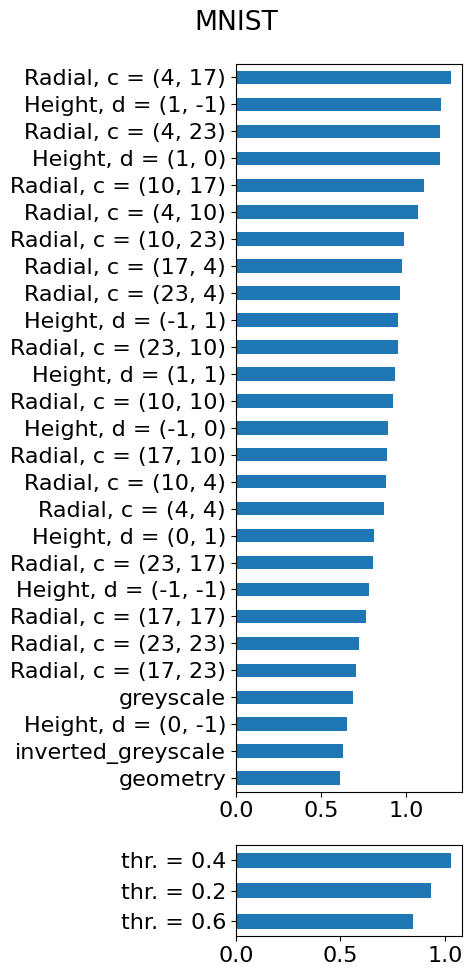

In [16]:
import re
import pandas
import matplotlib.pyplot as plt

def parse_filtration(value):
    if value in ('greyscale', 'inverted_greyscale', 'geometry'): return value
    return ', '.join(re.match(r"(.*)Filtration with (.*)", value).groups())
scores = pandas.read_csv("14/scores.csv")
scores['IV'] = scores['IV'].astype(float)
scores[["type", "details"]] = scores["feature"].str.split(" -> ", expand = True)
scores[["name", "threshold"]] = scores["type"].str.split(", bin. ", expand = True)
scores["name"] = scores["name"].apply(parse_filtration)

def draw(by: str, ax):
    grouped = scores.groupby(by = by).mean(numeric_only = True).reset_index()
    grouped = grouped.sort_values(by = 'IV', ascending = True)
    grouped.plot.barh(x = by, y = 'IV', ax = ax, legend = None)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.rcParams.update({'font.size': 16})
fig, (ax_name, ax_threshold) = plt.subplots(2, 1, figsize = (5, 10), height_ratios = [ 8, 1 ])
fig.suptitle("MNIST")
draw('name', ax_name)
draw('threshold', ax_threshold)
fig.tight_layout()
fig.savefig("14/iv.png")
fig.savefig("14/iv.svg")